### 1. Write Application of Recommender System.

###### 1. E-Commerce
Is an industry where recommendation systems were first widely used. With millions of customers and data on their online behavior, e-commerce companies are best suited to generate accurate recommendations.
###### 2. Retail
Target scared shoppers back in the 2000s when Target systems were able to predict pregnancies even before mothers realized their own pregnancies. Shopping data is the most valuable data as it is the most direct data point on a customer’s intent. Retailers with troves of shopping data are at the forefront of companies making accurate recommendations.

###### 3. Media
Similar to e-commerce, media businesses are one of the first to jump into recommendations. It is difficult to see a news site without a recommendation system.

###### 4. Banking
A mass-market product that is consumed digitally by millions. Banking for the masses and SMEs are prime for recommendations. Knowing a customer’s detailed financial situation, along with their past preferences, coupled with data of thousands of similar users, is quite powerful.

###### 5. Telecom
It Shares similar dynamics with banking. Telcos have access to millions of customers whose every interaction is recorded. Their product range is also rather limited compared to other industries, making recommendations in telecom an easier problem.

###### 6. Utilities
Similar dynamics with telecom, but utilities have an even narrower range of products, making recommendations rather simple.

### 2. What are Data Collection Method in Recommender System.

Data collection in recommender systems can be broadly classified into two categories:

###### Explicit Feedback:
This is the data that users consciously provide to the system. It includes ratings, reviews, likes, and dislikes. While explicit feedback is valuable as it directly reflects user preferences, it can be challenging to collect as it requires user effort.

###### Implicit Feedback: 
This is the data collected from user actions and behavior. It includes clicks, views, browsing history, and purchase history. Implicit feedback is easier to collect as it doesn't require any extra effort from the user. However, interpreting implicit feedback can be challenging as the absence of an action doesn't necessarily indicate disinterest.

### 3. Build a Basic Recommender system

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
movie=pd.read_csv("movies.csv")

In [6]:
rating=pd.read_csv("ratings.csv")

In [8]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
rating.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [12]:
df=pd.merge(movie,rating,on="movieId")

In [13]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [15]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
Saddest Music in the World, The (2003)    5.0
Interstate 60 (2002)                      5.0
Gunfighter, The (1950)                    5.0
Heima (2007)                              5.0
Limelight (1952)                          5.0
Name: rating, dtype: float64

- The movies have now been sorted according to the ascending order of their ratings.

- However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

- Lets count number of user give rating to each movie

In [17]:
df.groupby("title")["userId"].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: userId, dtype: int64

- Now, we can see some great movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes.

- So, let's create a new dataframe that contains both of these attributes.

- We will create a new dataframe called ratings_mean_count and first add the average rating of each movie to this dataframe as follows-

In [20]:
rating_mean_counts=pd.DataFrame()

In [21]:
rating_mean_counts["avg_rating"]=df.groupby("title")["rating"].mean()

In [23]:
rating_mean_counts["No.userId"]=df.groupby("title")["rating"].count()

In [24]:
rating_mean_counts

,avg_rating,No.userId
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
...,...,...
loudQUIETloud: A Film About the Pixies (2006),4.500000,1
xXx (2002),2.958333,24
xXx: State of the Union (2005),2.071429,7


We can see movie title, along with the average rating and number of ratings for the movies.

Now, let's plot a histogram for the number of ratings represented by the rating_counts column in the above dataframe

<Axes: >

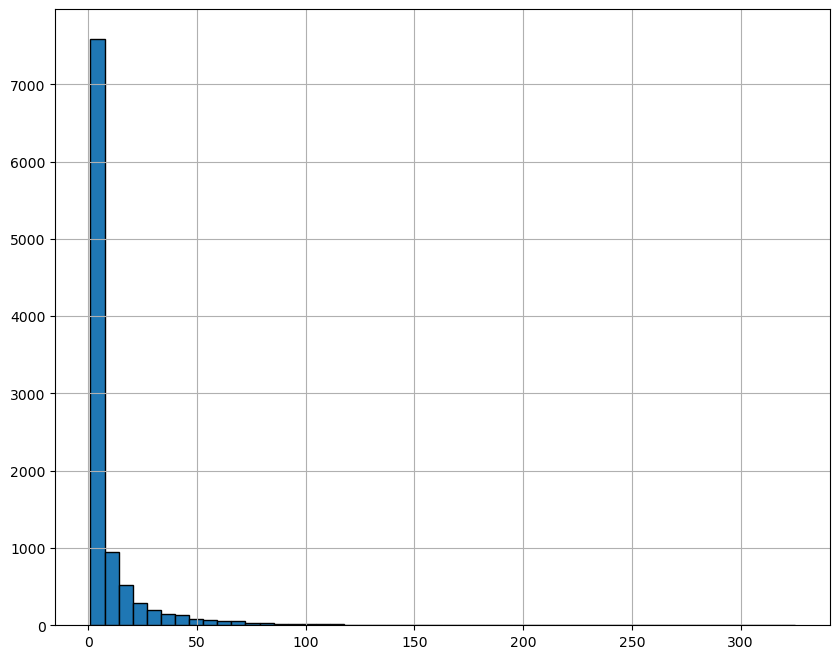

In [25]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean_counts['No.userId'].hist(bins=50)

From the above plot, we can see that most of the movies have received less than 50 ratings and there are no movies having more than 100 ratings.

Now, we will plot a histogram for average ratings

<Axes: >

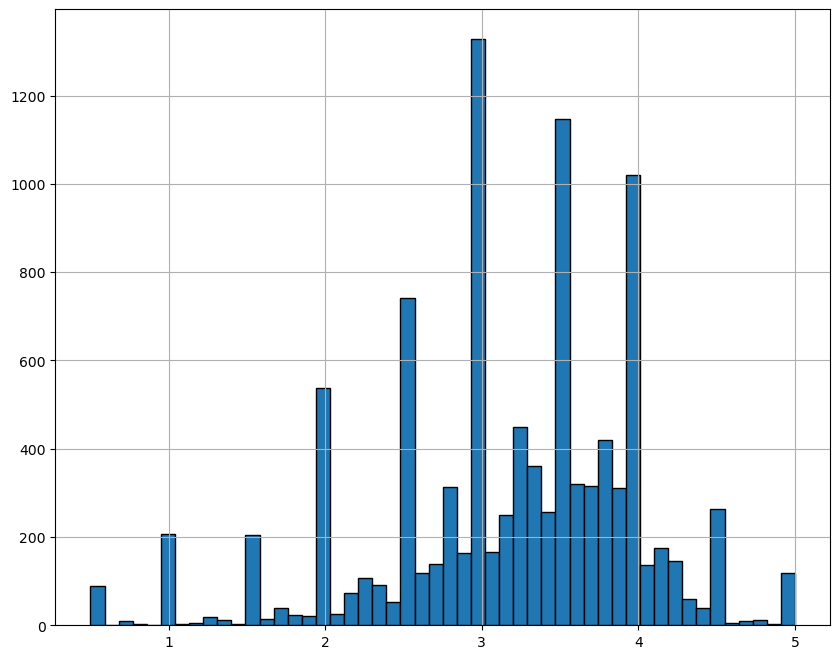

In [28]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
rating_mean_counts['avg_rating'].hist(bins=50)

- We can see that the integer values have taller bars than the floating values since most of the users assign rating as integer value i.e. 1, 2, 3, 4 or 5.

- Furthermore, it is evident that the data has a weak normal distribution with the mean of around 3.5. There are a few outliers in the data as well.

- Movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating.

- Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings.

<Figure size 1000x800 with 0 Axes>

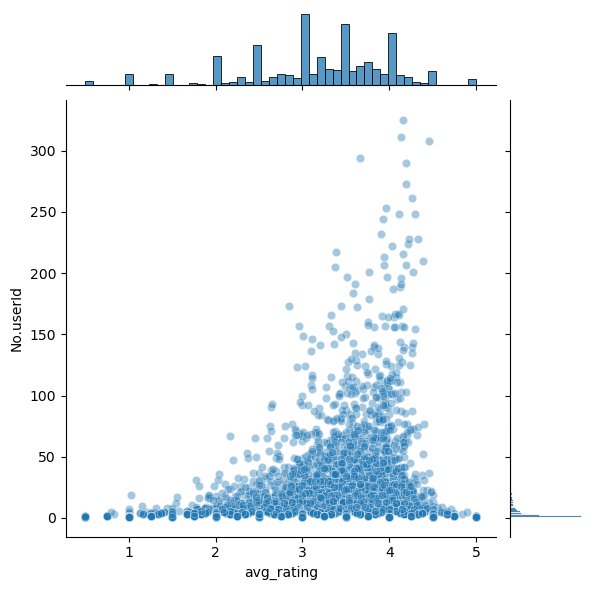

In [32]:

plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='avg_rating', y='No.userId', data=rating_mean_counts, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

##### Finding Similarities Between Movies

- Now, it is the time to find the similarity between the movies.

- We will use the correlation between the ratings of a movie as the similarity metric.

- To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.

- This matrix will have a lot of null values since every movie is not rated by every user.

In [34]:
user_movie_rating=df.pivot_table(index="userId",columns="title",values="rating")

- We know that each column contains all the user ratings for a particular movie.

- Now, let's find all the user ratings for the movie Forrest Gump (1994) and find the movies similar to it.

- We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.- 

We will find the user ratings for Forrest Gump (1994) as follows-

In [35]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head()


userId
1    3.0
2    NaN
3    3.0
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

We can find the correlation between the user ratings for the Forest Gump (1994) and all the other movies using corrwith() function as shown below:

In [37]:
movies_like_forest_gump =user_movie_rating.corrwith(forrest_gump_ratings)

In [38]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head()

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375


In [43]:
corr_forrest_gump.sort_values("Correlation",ascending=False).head(15)

,Correlation
title,
Martian Child (2007),1.0
Save the Tiger (1973),1.0
Underworld (1996),1.0
Shortbus (2006),1.0
"Court Jester, The (1956)",1.0
Bottle Shock (2008),1.0
Anna Karenina (2012),1.0
Elegy (2008),1.0
Half Light (2006),1.0


From the above output, we can see that the movies that have high correlation with Forrest Gump (1994) are not very well known.

This shows that correlation alone is not a good metric for similarity because there can be a user who watched 'Forest Gump (1994) and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings.

To do so, we will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe.

In [45]:
corr_forrest_gump["rating_count"]=rating_mean_counts["No.userId"]

In [46]:
corr_forrest_gump

,Correlation,rating_count
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3
...,...,...
[REC]² (2009),0.837708,4
eXistenZ (1999),0.025067,28
xXx (2002),0.096972,24


We can see that the movie 10, which has the highest correlation has only three ratings. This means that only three users gave same ratings to Forest Gump (1994).

However, we can deduce that a movie cannot be declared similar to the another movie based on just 3 ratings. This is why we added rating_counts column.

Now, let's now filter movies correlated to Forest Gump (1994), that have more than 50 ratings.

The following code snippet will do that-

In [51]:
corr_forrest_gump[corr_forrest_gump["rating_count"]>50].sort_values("Correlation",ascending=False).head()

,Correlation,rating_count
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52


Now, we can see from the above output the movies that are highly correlated with Forrest Gump (1994).

The movies in the list are some of the most famous movies Hollywood movies, and since Forest Gump (1994) is also a very famous movie, there is a high chance that these movies are highly correlated.